# GoogLeNet(Inception V3)

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [4]:
inceptionv3 = InceptionV3(input_shape=(299,299,3))
inceptionv3.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [5]:
!unzip animals.zip -d animals

Archive:  animals.zip
  inflating: animals/kirin.jpeg      
  inflating: animals/__MACOSX/._kirin.jpeg  
  inflating: animals/lion.jpeg       
  inflating: animals/__MACOSX/._lion.jpeg  
  inflating: animals/panda.jpeg      
  inflating: animals/__MACOSX/._panda.jpeg  
  inflating: animals/tiger.jpeg      
  inflating: animals/__MACOSX/._tiger.jpeg  


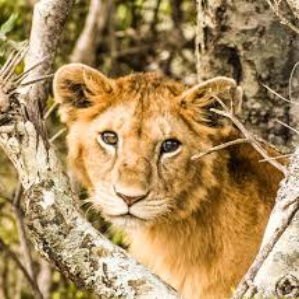

flatworm (100.00%)


In [19]:
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('animals/lion.jpeg', -1)
img = cv2.resize(img, (299, 299))

start = time.time()
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]

cv2_imshow(img)

print('%s (%.2f%%)' % (label[1], label[2]*100))